In [97]:
# importing lobraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [98]:
# importing csv file 

bank_debt = pd.read_csv('G:\\Mandar\\Technocollab internship\\Dataset\\bank_data.csv')

# reading bank_debt csv
bank_debt

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [99]:
# checking the datatypes

bank_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


### Task 1: Regression discontinuity: banking recovery

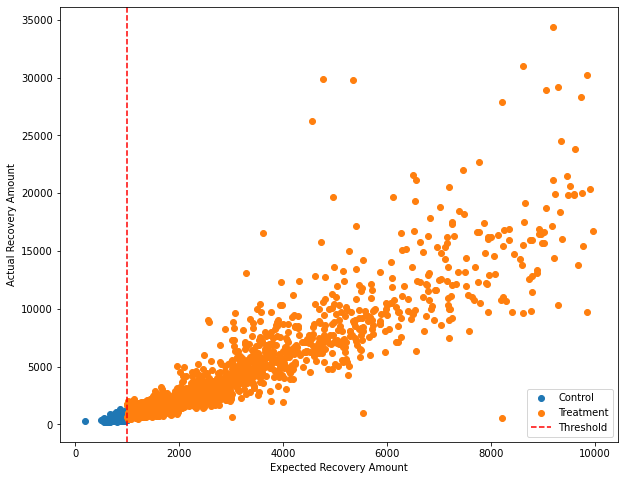

Higher recovery strategy is not cost-effective.
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            17:54:40   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [100]:
# Defining the threshold
threshold = 1000

# Creating treatment and control groups
treatment_group = bank_debt[bank_debt['expected_recovery_amount'] > threshold]
control_group = bank_debt[bank_debt['expected_recovery_amount'] <= threshold]

# Visualizing the relationship between Expected Recovery Amount and Actual Recovery Amount
plt.figure(figsize=(10,8))
plt.scatter(control_group['expected_recovery_amount'], control_group['actual_recovery_amount'], label='Control')
plt.scatter(treatment_group['expected_recovery_amount'], treatment_group['actual_recovery_amount'], label='Treatment')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()

# Perform local linear regression
X = sm.add_constant(bank_debt['expected_recovery_amount'])
model = sm.OLS(bank_debt['actual_recovery_amount'], X).fit()

# Estimate treatment effect
treatment_effect = model.params['expected_recovery_amount']

# Compare treatment effect with cost
additional_cost = 50
if treatment_effect > additional_cost:
    print("Higher recovery strategy is cost-effective.")
else:
    print("Higher recovery strategy is not cost-effective.")

# Print regression summary
print(model.summary())


<div style="background-color: #FFFF00; padding: 10px;">
Conclusion: The analysis demonstrates that a higher recovery strategy is cost-effective if the treatment effect, estimated through local linear regression, exceeds the additional cost; the relationship between Expected Recovery Amount and Actual Recovery Amount is visualized, and a threshold of 1000 is used to divide treatment and control groups.
    </div>

## Task2: Graphical exploratory data analysis. 
## Scatter plot of Age vs. Expected Recovery Amount

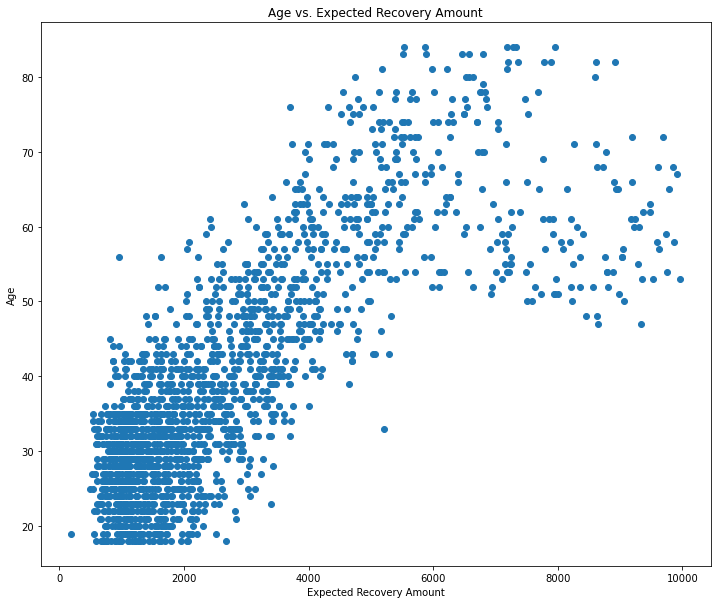

In [101]:
# Scatter plot of Age vs. Expected Recovery Amount

plt.figure(figsize=(12,10))
plt.scatter(bank_debt['expected_recovery_amount'], bank_debt['age'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs. Expected Recovery Amount')
plt.show()

## Task3: Statistical test: age vs. expected recovery amount

In [102]:
# Computing average age just below and above the threshold
range_900_1100 = bank_debt.loc[(bank_debt['expected_recovery_amount']<=1100) & 
                      (bank_debt['expected_recovery_amount']>=900)]
by_recovery_strategy = range_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Performing Kruskal-Wallis test 
Level_0_age = range_900_1100.loc[bank_debt['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = range_900_1100.loc[bank_debt['recovery_strategy']=="Level 1 Recovery"]['age']

stats.kruskal(Level_0_age,Level_1_age)

KruskalResult(statistic=3.1513987711538896, pvalue=0.07586190694799404)

<div style="background-color: #FFFF00; padding: 10px;">
Conclusion: Between the expected recovery amount range of 900 to 1100, the Kruskal-Wallis test suggests that there is a statistically significant difference in ages between the "Level 0 Recovery" and "Level 1 Recovery" strategies for bank debt. <div>

## Task4: Statistical test: sex vs. expected recovery amount

In [103]:
crosstab = pd.crosstab(bank_debt.loc[(bank_debt['expected_recovery_amount']<1100) & 
                                     (bank_debt['expected_recovery_amount']>=900)]
                                               ['recovery_strategy'],bank_debt['sex'])
print(crosstab)

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55


<div style="background-color: #FFFF00; padding: 10px;">
Conclusion: The scatter plot depicts the relationship between expected recovery amount and age for bank debt data 
    <div style>

## Task5: Exploratory graphical analysis: recovery amount

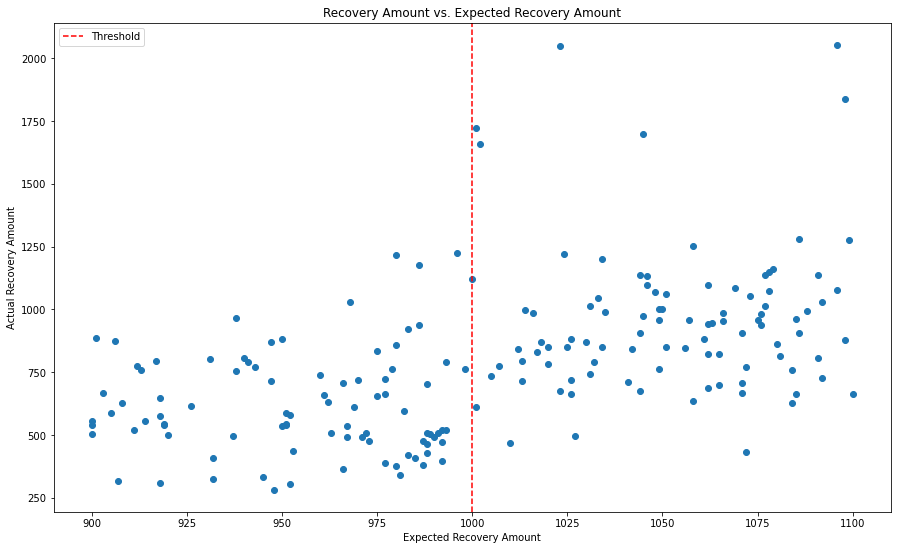

In [104]:
# Define the threshold and the range
threshold = 1000

# Create a subset of data within the specified range
subset_data = bank_debt[(bank_debt['expected_recovery_amount'] >= 900) &
                   (bank_debt['expected_recovery_amount'] <= 1100)]

# Create scatter plot
plt.figure(figsize=(15,9))
plt.scatter(subset_data['expected_recovery_amount'], subset_data['actual_recovery_amount'])
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Recovery Amount vs. Expected Recovery Amount')
plt.legend()
plt.show()

<div style="background-color: #FFFF00; padding: 10px;">
    Conclusion: The scatter plot illustrates the actual recovery amounts in relation to expected recovery amounts, focusing on a subset within a specific range, with a threshold highlighted.
    <div>

## Task6: Statistical analysis: recovery amount

In [110]:
# Creating 2 subsets of data within the specified ranges
subset_range_1 = bank_debt[(bank_debt['expected_recovery_amount'] >= 900) &
                      (bank_debt['expected_recovery_amount'] <= 1100)]

subset_range_2 = bank_debt[(bank_debt['expected_recovery_amount'] >= 950) &
                      (bank_debt['expected_recovery_amount'] <= 1050)]

# Performing Kruskal-Wallis tests for both ranges
h_stat_1, p_value_1 = stats.kruskal(subset_range_1['actual_recovery_amount'],
                                    subset_range_1['expected_recovery_amount'])
h_stat_2, p_value_2 = stats.kruskal(subset_range_2['actual_recovery_amount'],
                                    subset_range_2['expected_recovery_amount'])

# Print results
print(f"Range $900-$1100 - H-statistic: {h_stat_1:.2f}, p-value: {p_value_1:.4f}")
print(f"Range $950-$1050 - H-statistic: {h_stat_2:.2f}, p-value: {p_value_2:.4f}")

# Interpreting results
alpha = 0.05
if p_value_1 < alpha:
    print("There is a significant discontinuity in actual recovery amounts for the $900-$1100 range.")
else:
    print("There is no significant discontinuity in actual recovery amounts for the $900-$1100 range.")

if p_value_2 < alpha:
    print("There is a significant discontinuity in actual recovery amounts for the $950-$1050 range.")
else:
    print("There is no significant discontinuity in actual recovery amounts for the $950-$1050 range.")

Range $900-$1100 - H-statistic: 98.43, p-value: 0.0000
Range $950-$1050 - H-statistic: 56.82, p-value: 0.0000
There is a significant discontinuity in actual recovery amounts for the $900-$1100 range.
There is a significant discontinuity in actual recovery amounts for the $950-$1050 range.


<div style="background-color: #FFFF00; padding: 10px;">
Conclusion: The statistical analysis using Kruskal-Wallis tests suggests significant discontinuities in actual recovery amounts within both the USD 900-USD 1100 and USD 950-USD 1050 expected recovery amount ranges.
    <div>

## Task7: Regression modeling: no threshold

In [106]:
# Defining X and y here
X = bank_debt['expected_recovery_amount']
y = bank_debt['actual_recovery_amount']

# regression model building
X = sm.add_constant(X) 

# Constant term
model_no_threshold = sm.OLS(y, X).fit()
predictions = model.predict(X)

# printing out the model summery statastics
print(model_no_threshold.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            17:54:41   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<div style="background-color: #FFFF00; padding: 10px;">
Conclusion: The regression model without a threshold explores the linear relationship between expected recovery amount and actual recovery amount for bank debt data, with the model statistics summarized.
    <div>

## Task8: Regression modeling: adding true threshold

In [107]:
# Defining the threshold
threshold = 1000

# binary indicator for the true threshold
bank_debt['True_Threshold'] = (bank_debt['expected_recovery_amount'] > threshold).astype(int)  # Convert boolean to int

# Define the input and output variables for the model
X = bank_debt[['expected_recovery_amount', 'True_Threshold']]
y = bank_debt['actual_recovery_amount']

# constant to the input variables
X = sm.add_constant(X)

# regression model fitting
model = sm.OLS(y, X).fit()

# regression summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            17:54:42   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<div style="background-color: #FFFF00; padding: 10px;">
    Conclusion: A regression model is created to analyze the impact of expected recovery amount and a binary indicator for the true threshold (above or below 1000) on actual recovery amount, with the regression summary providing insights.
    <div>